#  Use SARIMAX to model the time series process 

# Define global variable(train_end, predict_start, predict_end) and common functions

Define train and predict windows 

In [41]:
# for development 
# train_end='2019-6'
# predict_start='2019-7'
# predict_end='2019-9'

# for final submit 
train_end='2019-9'
predict_start='2019-10'
predict_end='2019-12'

## Auto_arima Function
note the d is default at  0 and trace =True. Can turn it off or change

In [ ]:
# suppress warning to make cleaner output 
import warnings
warnings.filterwarnings("ignore")

In [42]:
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [43]:
import pmdarima as pm 
def auto_arima(df,col_exog,d=0):
    try:
        results=pm.auto_arima(df[['stock_distributed']],
                              exog=df[col_exog],
                              seasonal=True,information_criterion='bic',m=12,
                          d=d, D=0, 
                          max_p=4, max_q=4, 
                          trace=False, # can turn Trace off 
                          error_action='ignore',
                          suppress_warnings=True)
        print(results.order)
        print(results.seasonal_order)
        #print(col_exog)
        return[results.order,results.seasonal_order] 
    except:
        print('error searching')

## SARIMAX - Region_Producttype

It's region&product_type specific because the df_pred_agg_results_piece. The result collection part and the plot part assumes df is on regional level 

In [44]:

def predict_sarimax(df,order,seasonal_order,col_exog,plot=0):
    try:
        df_train=df[:train_end]
        df_test=df[predict_start:predict_end]
        model = SARIMAX(df_train['stock_distributed'], order=order,seasonal_order=seasonal_order,
                        exog=df_train[col_exog])
        result=model.fit()
        sarima_mean_insample=result.get_prediction(start=df_train.index[0],end=train_end,
                                                   exog=df_train[col_exog]).predicted_mean
        sarima_mean_outsample=result.get_prediction(start=predict_start,end=predict_end,
                                                    exog=df[predict_start:predict_end][col_exog]).predicted_mean
        sarima_mean_prediction=sarima_mean_insample.append(sarima_mean_outsample)
        region=df.iloc[0].region
        product_type=df.iloc[0].product_type
        
        df_pred_agg_results_piece=pd.DataFrame(data=sarima_mean_prediction,columns=['stock_distributed_forecasted'])
        df_pred_agg_results_piece['region']=region
        df_pred_agg_results_piece['product_type']=product_type 
        if plot==1:
            pd.DataFrame({'insample_pred':sarima_mean_insample,'outsample_pred':sarima_mean_outsample,'actual_value':df_train['stock_distributed']}).plot(); 
            plt.title(region+"--"+product_type)
            plt.show()
        return df_pred_agg_results_piece
    except:
        print('error')

# Import and process data 

## Import '../0_data/df_combined_fullsample.csv'

In [45]:
import pandas as pd
 #  contraceptive_logistics=pd.read_csv('../0_data/df_combined.csv') 
contraceptive_logistics=pd.read_csv('../0_data/df_combined_fullsample.csv')
contraceptive_logistics['day']=1
contraceptive_logistics['date']=pd.to_datetime(contraceptive_logistics[['year','month','day']])
contraceptive_logistics=contraceptive_logistics.sort_values('date')

## Aggregation on region & product_type level

In [46]:
product_agg_sum=contraceptive_logistics.groupby(['region','product_type','date'])['stock_distributed'].sum()
df_product_agg_sum=pd.DataFrame(data=product_agg_sum)
df_product_agg_sum=df_product_agg_sum.reset_index()

In [47]:
contraceptive_logistics.columns 

Index(['date', 'site_code', 'product_code', 'year', 'month',
       'stock_distributed', 'region', 'district', 'regionroads',
       'regionasphaltroads', 'regionearthroads', 'regionsurfacetreatmentroads',
       'regionpoorroads', 'poorroads', 'earthroads', 'asphaltroads',
       'site_type', 'product_type', 'temp', 'maxtemp', 'pressure',
       'relativehumidity', 'rainfallsnowmelt', 'visibility', 'windspeed',
       'maxsustainedwindspeed', 'rainordrizzle', 'storm', 'fog', 'day'],
      dtype='object')

In [48]:
col_continuous=['regionroads',
       'regionasphaltroads', 'regionearthroads', 'regionsurfacetreatmentroads',
       'regionpoorroads', 'poorroads', 'earthroads', 'asphaltroads',
       'site_type', 'product_type', 'temp', 'maxtemp', 'pressure',
       'relativehumidity', 'rainfallsnowmelt', 'visibility', 'windspeed',
       'maxsustainedwindspeed', 'rainordrizzle', 'storm', 'fog']
col_continuous.remove('site_type') # they are not continuous
col_continuous.remove('product_type') # they are not continuous

for col in col_continuous:
    #print(col)
    df_product_agg_sum[col]=pd.DataFrame(data=contraceptive_logistics.groupby(['region','product_type','date'])[col].mean().values)


regionroads
regionasphaltroads
regionearthroads
regionsurfacetreatmentroads
regionpoorroads
poorroads
earthroads
asphaltroads
temp
maxtemp
pressure
relativehumidity
rainfallsnowmelt
visibility
windspeed
maxsustainedwindspeed
rainordrizzle
storm
fog


# SARIMAX

- need to write this part 

In [49]:
col_exog=col_continuous

GBEKE
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=444.909, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=461.058, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=435.221, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=447.600, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=515.949, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=434.836, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=434.037, Time=0.10 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=437.780, Time=0.14 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : BIC=437.623, Time=0.30 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : BIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=461.502, Time=0.06 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=435.519, Time=0.08 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : BIC=435.151, Time=0.13 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : BIC=439.011, Time=0.22 sec
 ARIM

C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


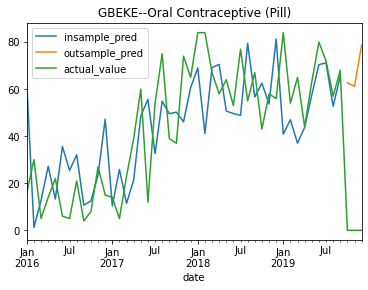

GBOKLE-NAWA-SAN PEDRO
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=647.198, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=643.984, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=702.839, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=644.552, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : BIC=645.124, Time=0.49 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.25 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=inf, Time=0.18 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : BIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=647.450, Time=0.11 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=647.853, Time=0.29 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : BIC=647.915, Time=0.15 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=644.382, Time=0.16 sec
 ARIM

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


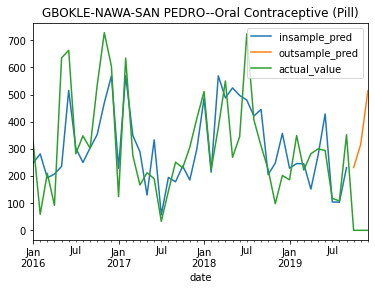

In [50]:
# test a few 
df_pred_region_product_type=pd.DataFrame()
for region in df_product_agg_sum['region'].unique()[6:8] :
    df1=df_product_agg_sum[df_product_agg_sum['region']==region];
    for product_type in df1['product_type'].unique()[6:8]:
        df2=df1[df1['product_type']==product_type].copy();
        df2['date']=pd.to_datetime(df2['date']);
        df2=df2.set_index(['date']);
        df2=df2.resample('MS').fillna('nearest')
        print(region)
        print(product_type)
        #fit_and_plot_forecast(df2)
        if(len(df2)>10):
            [order,seasonal_order]=auto_arima(df2,col_exog); 
            #result_piece= predict_sarimax(df2,order,seasonal_order,col_exog);
            result_piece= predict_sarimax(df2,order,seasonal_order,col_exog,plot=1);
            df_pred_region_product_type=pd.concat([df_pred_region_product_type,result_piece])

## Export : '../2_pipeline/final_pred_region_producttype_lev.csv'

In [24]:
len(df_pred_region_product_type)

5521

In [ ]:
run_full_data=0

ABIDJAN 1-GRANDS PONTS
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=596.163, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=627.002, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=590.169, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=614.394, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=675.513, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=587.485, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=590.395, Time=0.14 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=593.898, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=586.953, Time=0.07 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=589.681, Time=0.23 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=589.865, Time=0.19 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : BIC=593.506, Time=0.33 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : BIC=588.123, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=589.457, Ti

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


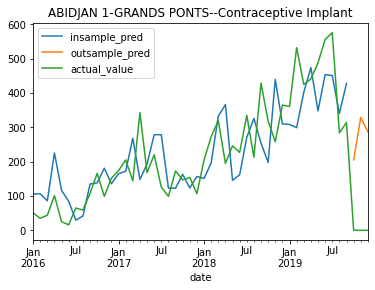

ABIDJAN 1-GRANDS PONTS
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=362.241, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=347.328, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=353.502, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=353.355, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=355.081, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=349.738, Time=0.09 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=349.593, Time=0.09 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=353.294, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=351.099, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=351.095, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=354.974, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.587 seconds
(0, 0, 0)
(0, 0, 0, 12)


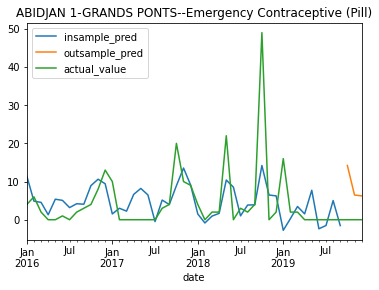

ABIDJAN 1-GRANDS PONTS
Female Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=209.771, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=193.172, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=196.221, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=194.908, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=192.488, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=196.770, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=196.752, Time=0.04 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=192.483, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=196.210, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=194.837, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=195.083, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=191.221, Time=0.02 sec
 ARI

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


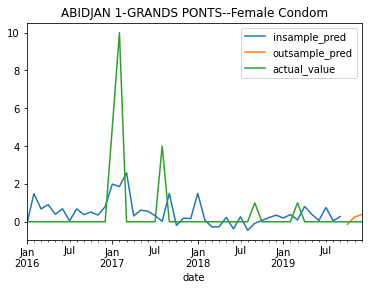

ABIDJAN 1-GRANDS PONTS
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=717.409, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=712.949, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=710.465, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=713.364, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=809.480, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=707.530, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=710.412, Time=0.13 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=714.220, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=710.285, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=710.880, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=710.496, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=713.961, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=717.005, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Tot

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


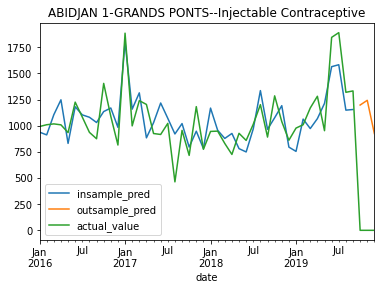

ABIDJAN 1-GRANDS PONTS
Intrauterine Device (IUD)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=297.055, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=361.051, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=313.525, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=330.647, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=362.815, Time=0.00 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : BIC=293.350, Time=0.31 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : BIC=289.684, Time=0.15 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : BIC=293.340, Time=0.36 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : BIC=290.085, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=296.344, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[12] intercept   : BIC=293.284, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[12] intercept   : BIC=293.338, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=302.285, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[12] intercept   : BIC=291.662

C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


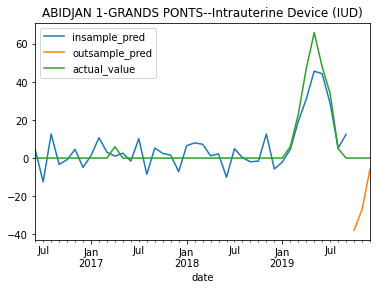

ABIDJAN 1-GRANDS PONTS
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=569.647, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=576.586, Time=0.26 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=576.643, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=583.053, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=573.448, Time=0.14 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=573.456, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=577.327, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=572.717, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=572.772, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=576.419, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.856 seconds
(0, 0, 0)
(0, 0, 0, 12)


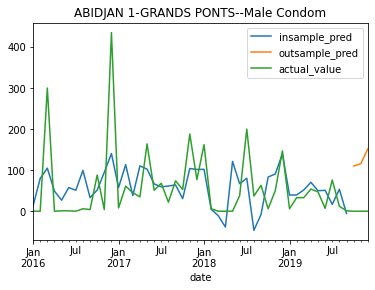

ABIDJAN 1-GRANDS PONTS
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=712.619, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=716.171, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=701.404, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=709.283, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=813.351, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=698.728, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=701.491, Time=0.06 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=702.683, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=702.853, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=705.772, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=705.727, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=701.891, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total 

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


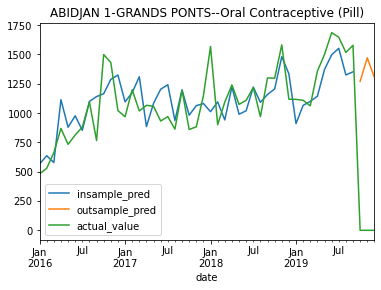

ABIDJAN 2
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=603.406, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=605.181, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=591.237, Time=0.19 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=597.457, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=662.457, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=587.797, Time=0.07 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=591.148, Time=0.26 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=594.819, Time=0.39 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=590.989, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=590.176, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=593.743, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=593.679, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=590.932, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 2.2

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


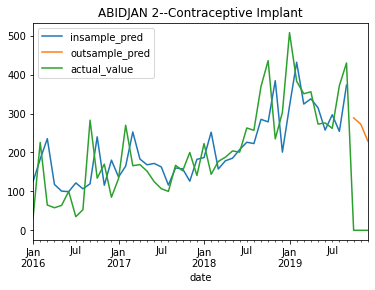

ABIDJAN 2
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=1.12 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=319.294, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=325.360, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=325.546, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=321.136, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=322.218, Time=0.10 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=322.082, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=325.722, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=322.071, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=322.483, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=321.974, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 2.100 seconds
(0, 0, 0)
(0, 0, 0, 12)


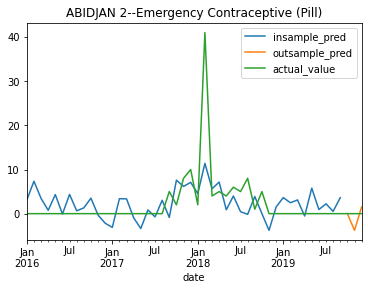

ABIDJAN 2
Female Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=273.879, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=254.316, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=260.686, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=260.329, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=262.510, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=257.443, Time=0.08 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=257.499, Time=0.08 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=261.296, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=257.443, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=257.035, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=261.089, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.459 seconds
(0, 0, 0)
(0, 0, 0, 12)


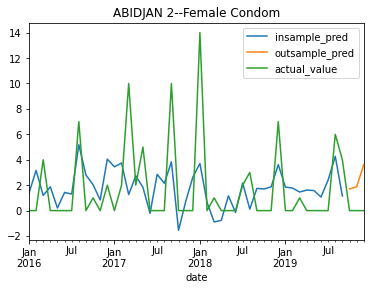

ABIDJAN 2
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=738.885, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=726.909, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=732.489, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=819.584, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=723.234, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=726.789, Time=0.64 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=730.658, Time=0.78 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=726.399, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=726.500, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=728.967, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=730.105, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=726.184, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 3.28

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


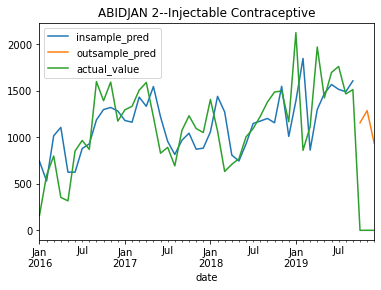

ABIDJAN 2
Intrauterine Device (IUD)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=226.159, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=233.541, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=233.544, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=236.600, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=229.803, Time=0.07 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=229.807, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=233.537, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=229.890, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=229.893, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=231.276, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.747 seconds
(0, 0, 0)
(0, 0, 0, 12)


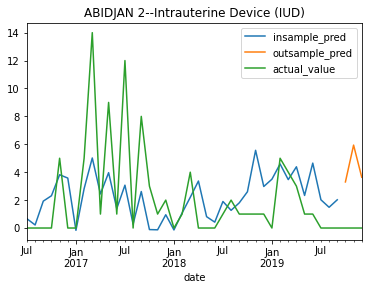

ABIDJAN 2
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=534.645, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=538.889, Time=0.25 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=539.252, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=572.788, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=538.405, Time=0.22 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=538.319, Time=0.13 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=541.661, Time=0.76 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=535.020, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=535.427, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=537.894, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 3.213 seconds
(0, 0, 0)
(0, 0, 0, 12)


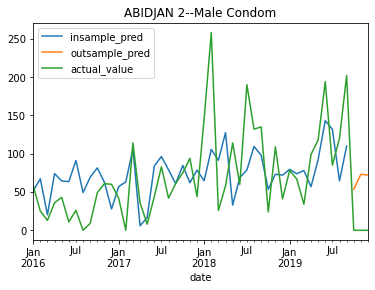

ABIDJAN 2
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=735.173, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=723.558, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=723.205, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=725.594, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=800.627, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=719.374, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=723.116, Time=0.12 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=726.976, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=723.060, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=723.569, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=721.798, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=725.744, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=728.783, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time:

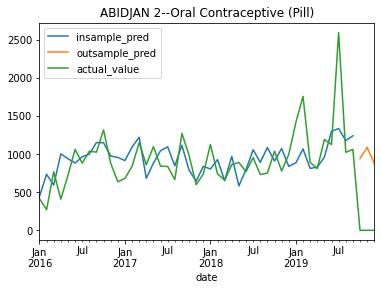

AGNEBY-TIASSA-ME
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=523.823, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=562.931, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=516.093, Time=0.31 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=547.550, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=589.515, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=512.426, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=516.057, Time=0.19 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=509.232, Time=0.09 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=513.021, Time=0.27 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=513.021, Time=0.25 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : BIC=516.898, Time=0.26 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : BIC=512.341, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=512.273, Time=0.14 se

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


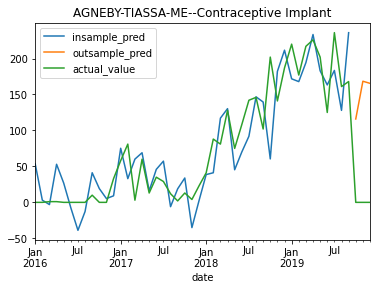

AGNEBY-TIASSA-ME
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=242.979, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=228.063, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=233.791, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=234.530, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=231.001, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=231.930, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=231.930, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=230.171, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=230.815, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=232.799, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.835 seconds
(0, 0, 0)
(0, 0, 0, 12)


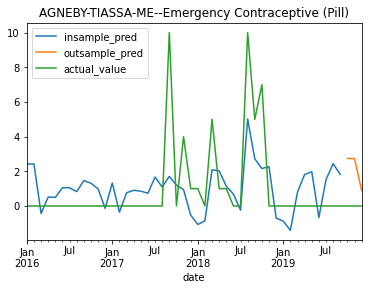

AGNEBY-TIASSA-ME
Female Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=197.184, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=204.846, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=204.840, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=195.733, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=201.023, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=201.021, Time=0.04 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=201.007, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=201.002, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=inf, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.685 seconds
(0, 0, 0)
(0, 0, 0, 12)


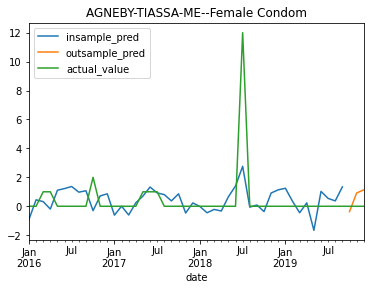

AGNEBY-TIASSA-ME
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=663.207, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=646.143, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=647.883, Time=0.26 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=648.335, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=727.516, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=648.305, Time=0.17 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=647.434, Time=0.13 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=650.903, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=644.901, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=647.812, Time=0.24 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=651.685, Time=0.28 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=648.458, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=648.627, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=645.969, Time=

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


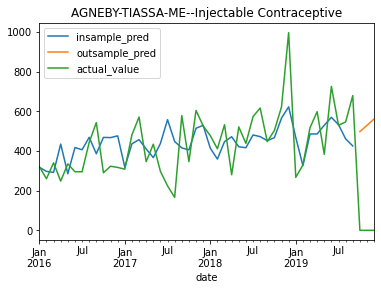

AGNEBY-TIASSA-ME
Intrauterine Device (IUD)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=259.794, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=267.236, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=267.233, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=257.068, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=263.524, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=263.524, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=267.252, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=263.506, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=263.504, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.653 seconds
(0, 0, 0)
(0, 0, 0, 12)


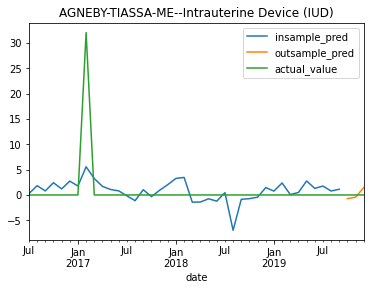

AGNEBY-TIASSA-ME
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=571.883, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=556.249, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=560.203, Time=0.25 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=560.436, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=592.492, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=560.120, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=560.120, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=563.991, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=556.537, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=556.653, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=560.355, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.507 seconds
(0, 0, 0)
(0, 0, 0, 12)


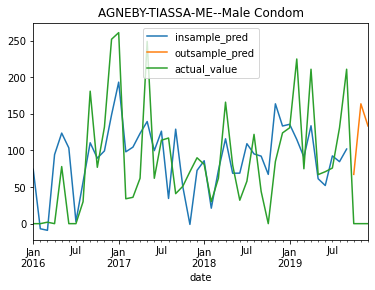

AGNEBY-TIASSA-ME
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=581.337, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=560.872, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=566.823, Time=0.32 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=566.968, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=624.638, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=564.392, Time=0.14 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=564.281, Time=0.13 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=567.904, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=563.338, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=563.595, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=566.676, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 2.161 seconds
(0, 0, 0)
(0, 0, 0, 12)


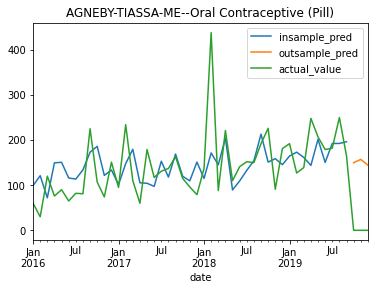

BELIER
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=398.561, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=404.879, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=404.868, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=436.674, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=401.208, Time=0.10 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=401.090, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=402.001, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=402.163, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=403.150, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.800 seconds
(0, 0, 0)
(0, 0, 0, 12)


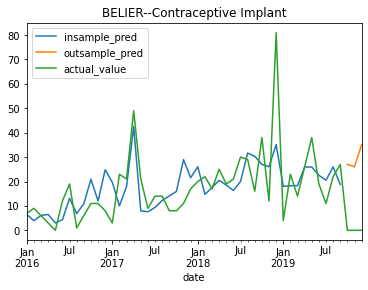

BELIER
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=180.132, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=182.136, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=184.097, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=182.028, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=182.926, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=182.765, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=186.387, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=178.531, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=182.114, Time=0.06 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=177.240, Time=0.04 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=181.047, Time=0.09 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=181.044, Time=0.08 sec
 AR

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


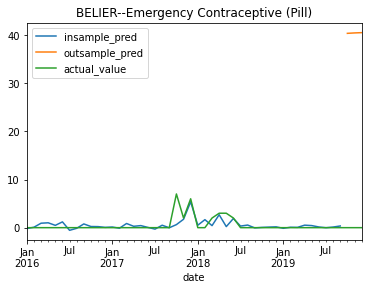

BELIER
Female Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=396.306, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=404.007, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=404.004, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=393.617, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=400.167, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=400.166, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=400.147, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=400.145, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=inf, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.748 seconds
(0, 0, 0)
(0, 0, 0, 12)


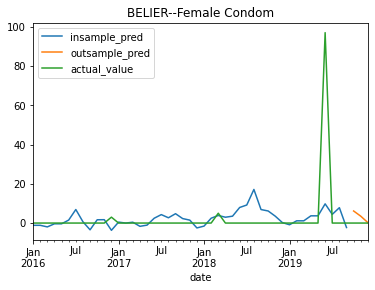

BELIER
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=602.923, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=592.204, Time=0.50 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=597.296, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=675.051, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=589.192, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=591.594, Time=0.31 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.59 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=591.733, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=592.041, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=595.489, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=595.591, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=595.005, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 3.338 secon

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


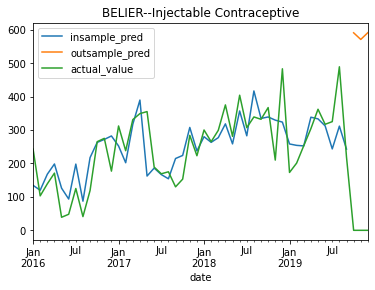

BELIER
Intrauterine Device (IUD)
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-879.788, Time=0.02 sec
Total fit time: 0.025 seconds
(0, 0, 0)
(0, 0, 0, 0)


C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


error
BELIER
Male Condom
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-1243.161, Time=0.02 sec
Total fit time: 0.023 seconds
(0, 0, 0)
(0, 0, 0, 0)


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


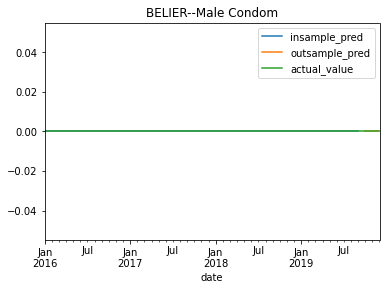

BELIER
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=608.905, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=615.426, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=615.334, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=675.767, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=611.663, Time=0.15 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=611.536, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=615.404, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=612.520, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=612.589, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=615.296, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.929 seconds
(0, 0, 0)
(0, 0, 0, 12)


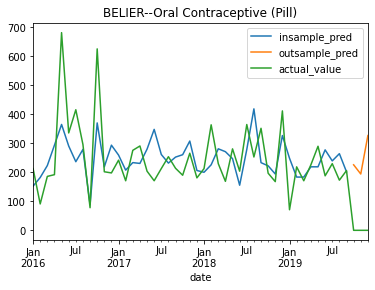

BOUNKANI-GONTOUGO
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=426.575, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=433.930, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=433.956, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=435.732, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=430.353, Time=0.08 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=430.383, Time=0.07 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=434.002, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=430.145, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=430.148, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=434.016, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.636 seconds
(0, 0, 0)
(0, 0, 0, 12)


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


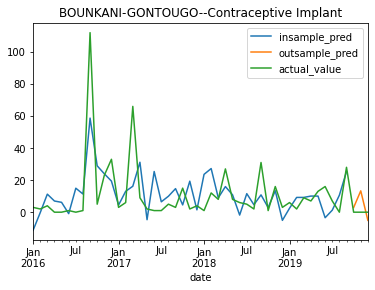

BOUNKANI-GONTOUGO
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=278.803, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=265.647, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=269.675, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=267.206, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=266.044, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=269.325, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=269.370, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=265.909, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=263.374, Time=0.04 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=267.187, Time=0.08 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : BIC=270.596, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=264.097, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : BIC=265.231, Ti

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


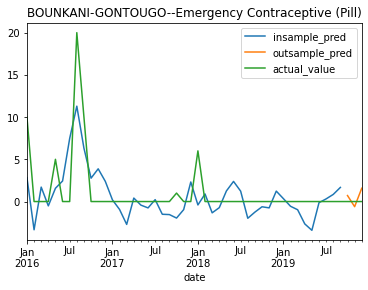

BOUNKANI-GONTOUGO
Female Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=240.436, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=220.390, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=226.895, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=227.030, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=221.184, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=223.987, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=223.959, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=223.185, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=223.359, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=225.691, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.557 seconds
(0, 0, 0)
(0, 0, 0, 12)


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


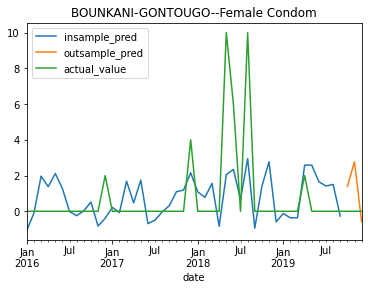

BOUNKANI-GONTOUGO
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=594.633, Time=0.87 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=575.406, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=580.122, Time=0.28 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=579.791, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=626.516, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=579.239, Time=0.11 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=579.240, Time=0.09 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=583.111, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=576.294, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=575.930, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=579.360, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.895 seconds
(0, 0, 0)
(0, 0, 0, 12)


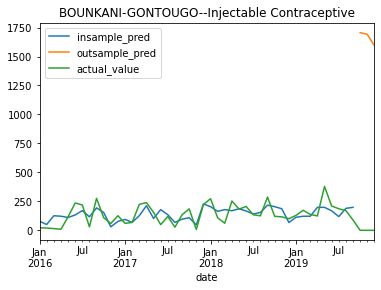

BOUNKANI-GONTOUGO
Intrauterine Device (IUD)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=167.244, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=174.278, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=174.265, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=176.978, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=170.641, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=170.628, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=170.852, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=170.852, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=174.363, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.590 seconds
(0, 0, 0)
(0, 0, 0, 12)


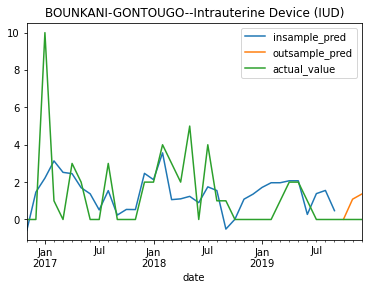

BOUNKANI-GONTOUGO
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=500.633, Time=0.87 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=485.829, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=487.936, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=489.099, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=487.498, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=488.994, Time=0.17 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=488.709, Time=0.15 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=492.516, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=484.136, Time=0.07 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=487.914, Time=0.22 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=491.732, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=487.271, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=487.304, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=485.228, Time=0.09 sec
 AR

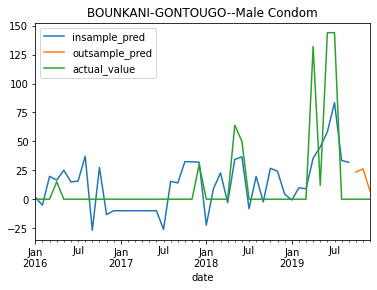

BOUNKANI-GONTOUGO
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=544.341, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=543.550, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=541.173, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=577.685, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=544.754, Time=0.07 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : BIC=inf, Time=0.44 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : BIC=inf, Time=0.59 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=543.208, Time=0.19 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : BIC=548.090, Time=0.63 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=538.030, Time=0.12 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : BIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=540.551, Time=0.31 sec
 ARIMA(0,

C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


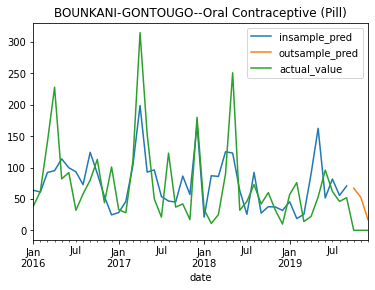

CAVALLY-GUEMON
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=646.882, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=625.376, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=631.936, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=632.002, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=635.370, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=628.628, Time=0.14 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=628.642, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=632.521, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=628.435, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=628.552, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=632.091, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.798 seconds
(0, 0, 0)
(0, 0, 0, 12)


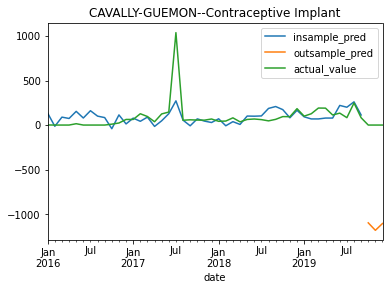

CAVALLY-GUEMON
Emergency Contraceptive (Pill)
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-724.103, Time=0.02 sec
Total fit time: 0.023 seconds
(0, 0, 0)
(0, 0, 0, 0)
error
CAVALLY-GUEMON
Female Condom
CAVALLY-GUEMON

C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=568.120, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=559.282, Time=0.25 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=564.492, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=629.922, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=556.532, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=558.892, Time=0.24 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=562.336, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=559.642, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=558.730, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=560.877, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=562.474, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=561.069, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 2.253 seconds

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


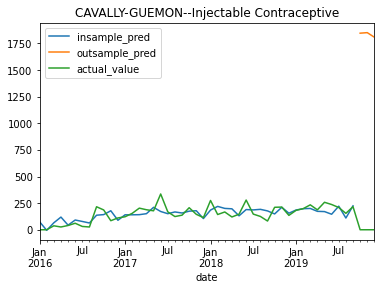

CAVALLY-GUEMON
Intrauterine Device (IUD)
CAVALLY-GUEMON
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=665.958, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=667.352, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=667.024, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=679.505, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=669.492, Time=0.10 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=669.419, Time=0.04 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=673.222, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=664.015, Time=0.01 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=667.314, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=671.084, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=667.729, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=667.733, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept 

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


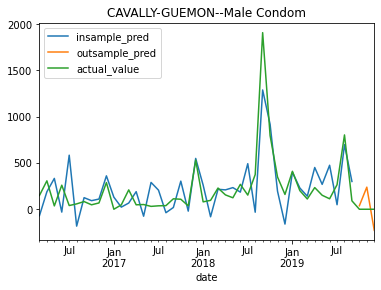

CAVALLY-GUEMON
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=461.596, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=443.756, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=521.492, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=447.492, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : BIC=442.894, Time=0.63 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : BIC=446.743, Time=1.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=444.045, Time=0.34 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : BIC=454.751, Time=0.53 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : BIC=443.936, Time=0.86 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : BIC=443.823, Time=0.86 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : BIC=452.450, Time=0.61 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : BIC=447.656, Time=1.11 sec


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


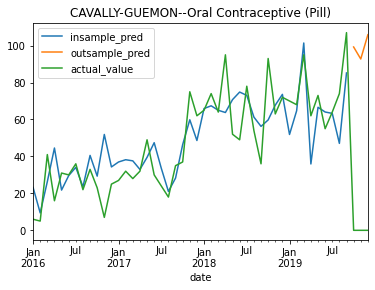

GBEKE
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=440.687, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=407.609, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=425.634, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=484.901, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=405.333, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=406.176, Time=0.17 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=409.515, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=403.782, Time=0.06 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=406.071, Time=0.22 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=403.857, Time=0.17 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.39 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : BIC=407.318, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=407.435, Time=0.10 sec
 ARIMA(1,0,1)

C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


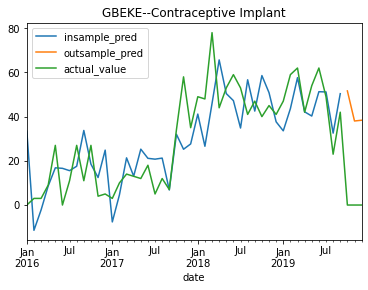

GBEKE
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=1.12 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=243.583, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=248.568, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=249.071, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=246.546, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=246.506, Time=0.07 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=246.554, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=250.295, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=245.154, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=245.756, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=247.538, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.826 seconds
(0, 0, 0)
(0, 0, 0, 12)


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


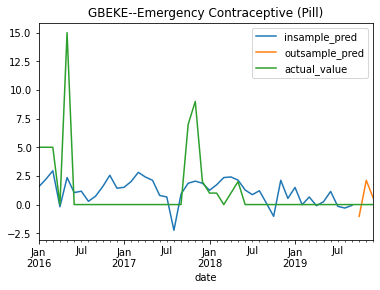

GBEKE
Female Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.95 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=200.305, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=195.847, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=198.476, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=191.990, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=195.847, Time=0.09 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=199.716, Time=0.41 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=189.702, Time=0.06 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=193.529, Time=0.14 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=193.528, Time=0.11 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : BIC=197.386, Time=0.48 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : BIC=191.215, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=inf, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[12] 

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


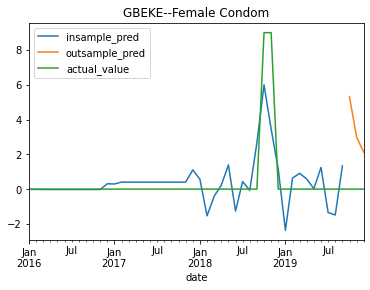

GBEKE
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=536.628, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=532.259, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=523.598, Time=0.34 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=528.654, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=587.688, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=521.648, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=523.710, Time=0.17 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=526.824, Time=0.57 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=524.193, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=524.434, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=526.274, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=528.063, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=527.615, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 2.88

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


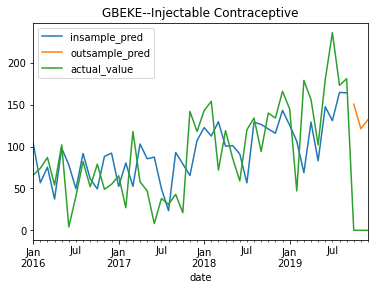

GBEKE
Intrauterine Device (IUD)
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-983.596, Time=0.04 sec
Total fit time: 0.043 seconds
(0, 0, 0)
(0, 0, 0, 0)


C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


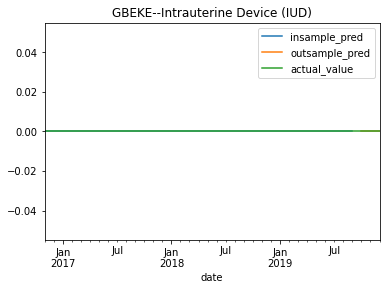

GBEKE
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=523.995, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=531.618, Time=0.20 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=531.601, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=526.833, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=527.778, Time=0.10 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=527.761, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.41 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=527.836, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=527.838, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=531.709, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 2.355 seconds
(0, 0, 0)
(0, 0, 0, 12)


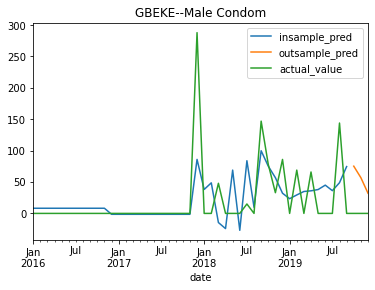

GBEKE
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=444.909, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=461.058, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=435.221, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=447.600, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=515.949, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=434.836, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=434.037, Time=0.16 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=437.780, Time=0.22 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : BIC=437.623, Time=0.50 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : BIC=inf, Time=1.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=461.502, Time=0.10 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=435.519, Time=0.12 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : BIC=435.151, Time=0.20 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : BIC=439.011, Time=0.34 sec
 ARIM

C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


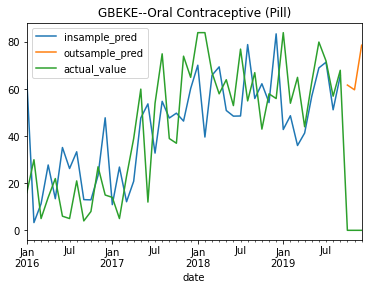

GBOKLE-NAWA-SAN PEDRO
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=554.406, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=551.615, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=552.326, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=614.405, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=548.644, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=551.048, Time=0.21 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.46 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=552.500, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=552.489, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=549.987, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=556.369, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=556.773, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time:

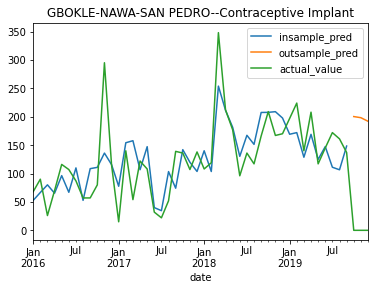

GBOKLE-NAWA-SAN PEDRO
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=276.224, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=283.934, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=283.919, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=277.646, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=280.076, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=280.063, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=280.090, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=280.092, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=282.441, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.941 seconds
(0, 0, 0)
(0, 0, 0, 12)


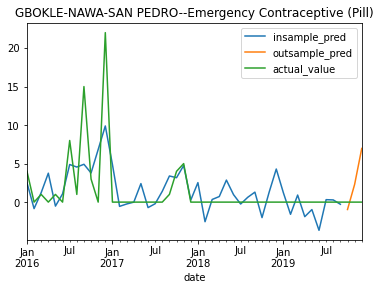

GBOKLE-NAWA-SAN PEDRO
Female Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=229.294, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=236.443, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=236.441, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=226.697, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=232.866, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=232.867, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=232.876, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=232.874, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=inf, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 2.045 seconds
(0, 0, 0)
(0, 0, 0, 12)
error
GBOKLE-NAWA-SAN PEDRO
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,

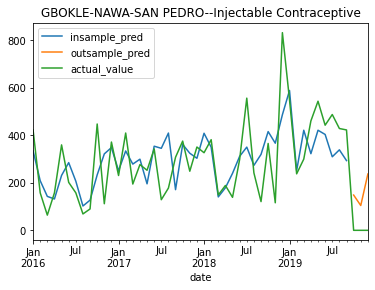

GBOKLE-NAWA-SAN PEDRO
Intrauterine Device (IUD)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=123.177, Time=0.92 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=102.252, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=109.560, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=109.570, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=99.973, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=105.926, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=105.924, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=109.590, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=105.888, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=105.901, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=109.193, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.727 seconds
(0, 0, 0)
(0, 0, 0, 12)


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


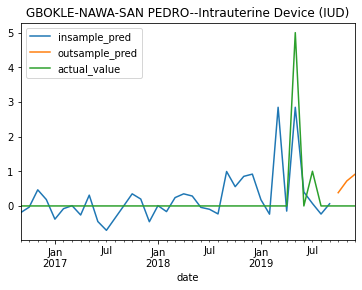

GBOKLE-NAWA-SAN PEDRO
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=637.180, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=644.773, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=644.763, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=635.056, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=640.983, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=640.977, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=644.846, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=640.984, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=640.978, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=644.858, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.889 seconds
(0, 0, 0)
(0, 0, 0, 12)


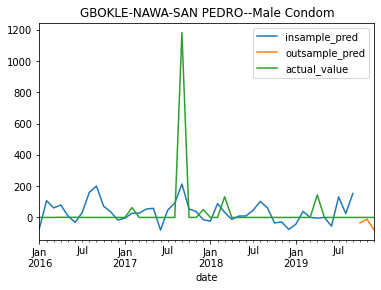

GBOKLE-NAWA-SAN PEDRO
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=647.198, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=643.984, Time=0.35 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=702.839, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=644.552, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : BIC=645.124, Time=0.84 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.48 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=inf, Time=0.35 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : BIC=inf, Time=1.13 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=647.450, Time=0.18 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=647.853, Time=0.42 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : BIC=647.915, Time=0.23 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=644.382, Time=0.24 sec
 ARIM

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


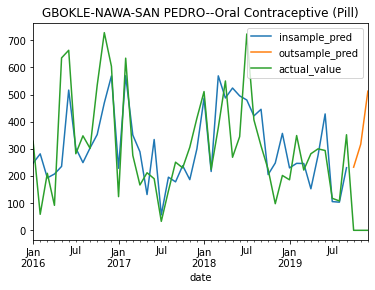

GOH
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=448.362, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=421.049, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=435.484, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=475.594, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=417.247, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=421.051, Time=0.11 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.49 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=420.184, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=420.264, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=431.668, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=424.018, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=416.678, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12]             : BIC=420.527, Time=0.06 sec
 ARIMA(1,0,0)(0

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


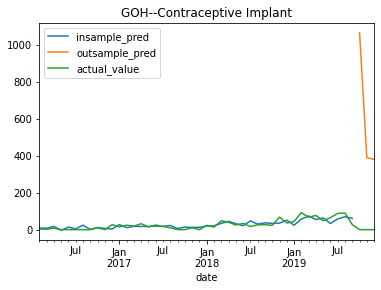

GOH
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=293.658, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=289.096, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=293.609, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=299.806, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=285.608, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=289.065, Time=0.09 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=285.587, Time=0.04 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=289.005, Time=0.11 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=288.923, Time=0.10 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.54 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : BIC=284.652, Time=0.07 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : BIC=288.203, Time=0.16 sec
 ARIMA(3,0

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


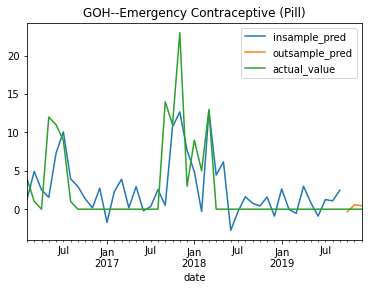

GOH
Female Condom
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-1009.550, Time=0.05 sec
Total fit time: 0.054 seconds
(0, 0, 0)
(0, 0, 0, 0)


C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


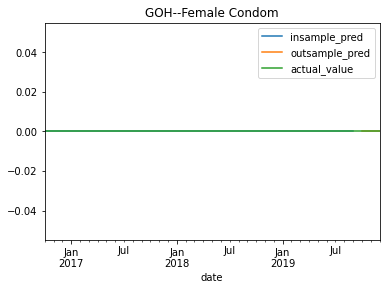

GOH
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=602.473, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=598.854, Time=0.28 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=601.117, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=679.854, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=595.505, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=598.778, Time=0.14 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=602.620, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=599.373, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=599.411, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=598.062, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=602.729, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=603.968, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 2.211 seco

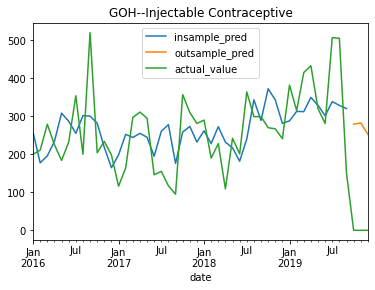

GOH
Intrauterine Device (IUD)
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-853.838, Time=0.02 sec
Total fit time: 0.027 seconds
(0, 0, 0)
(0, 0, 0, 0)
error

C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



GOH
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=616.310, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=622.821, Time=0.70 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=624.513, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=618.955, Time=0.18 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=619.110, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=622.807, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=620.172, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=620.170, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 2.975 seconds
(0, 0, 0)
(0, 0, 0, 12)


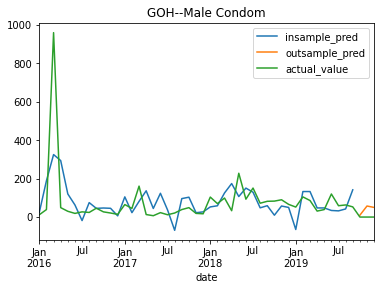

GOH
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=604.748, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=604.515, Time=0.33 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=605.605, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=674.751, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=601.827, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=604.380, Time=0.25 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=608.268, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=601.193, Time=0.12 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=604.766, Time=0.32 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=604.790, Time=0.29 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : BIC=608.623, Time=0.29 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : BIC=594.510, Time=0.17 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : BIC=598.371, Time=0.46 sec
 ARIMA(

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


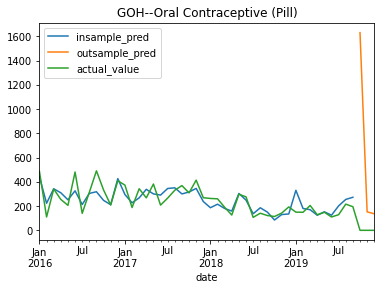

HAMBOL
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=488.505, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=471.110, Time=0.20 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=476.595, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=550.373, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=468.185, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=471.348, Time=0.16 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=474.692, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=471.993, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=472.003, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=472.963, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=inf, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=471.138, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 1.921 seconds


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


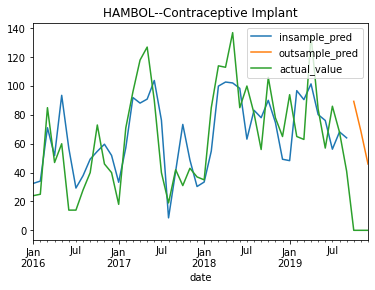

HAMBOL
Emergency Contraceptive (Pill)
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-386.990, Time=0.02 sec
Total fit time: 0.021 seconds
(0, 0, 0)
(0, 0, 0, 0)
error
HAMBOL
Female Condom
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-516.601, Time=0.02 sec
Total fit time: 0.020 seconds
(0, 0, 0)
(0, 0, 0, 0)


C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


error
HAMBOL
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=553.418, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=549.030, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=544.348, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=546.369, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=618.157, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=544.889, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : BIC=548.216, Time=0.81 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=548.216, Time=0.37 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=544.543, Time=0.18 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : BIC=552.080, Time=0.73 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=549.037, Time=0.15 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=548.148, Time=0.35 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : BIC=548.182, Time=0.39 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=546.188, Time=0.19

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


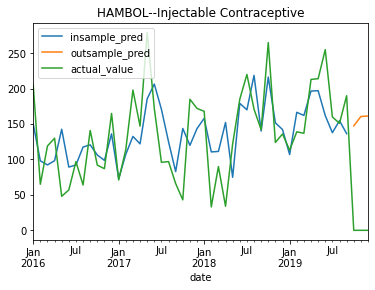

HAMBOL
Intrauterine Device (IUD)
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-309.273, Time=0.02 sec
Total fit time: 0.025 seconds
(0, 0, 0)
(0, 0, 0, 0)
error
HAMBOL
Male Condom
Performing stepwise search to minimize bic


C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=445.102, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=452.491, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=452.493, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=446.379, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=448.855, Time=0.08 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=448.907, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=451.712, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=448.665, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=448.642, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=452.492, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.698 seconds
(0, 0, 0)
(0, 0, 0, 12)


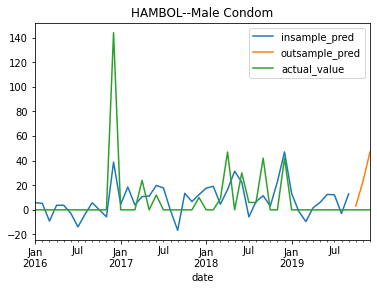

HAMBOL
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=472.811, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=453.448, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=460.429, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=460.246, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=518.044, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=457.313, Time=0.14 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=457.311, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=461.182, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=456.572, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=456.399, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=460.191, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.483 seconds
(0, 0, 0)
(0, 0, 0, 12)


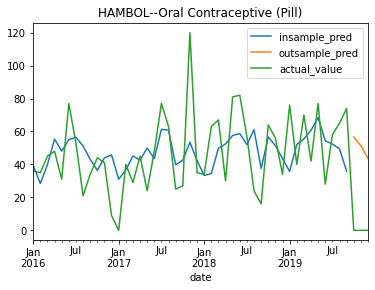

HAUT-SASSANDRA
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=515.968, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=502.462, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=511.134, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=567.973, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=498.591, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=502.461, Time=0.09 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=506.331, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=500.374, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=500.263, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=507.305, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=504.135, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=502.311, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 1.

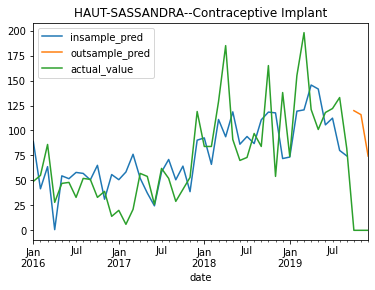

HAUT-SASSANDRA
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=180.068, Time=0.83 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=182.848, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=167.811, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=170.137, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=183.265, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=163.965, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=167.810, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.47 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=166.140, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=166.270, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=166.453, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=170.002, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=161.046, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12]             : BIC=164.917, Time=

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


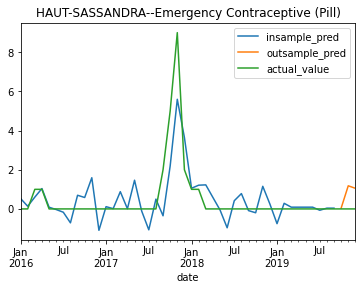

HAUT-SASSANDRA
Female Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=540.791, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=548.301, Time=0.19 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=548.353, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=539.036, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=544.546, Time=0.08 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=544.542, Time=0.07 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=548.410, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=544.571, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=544.615, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=546.020, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.265 seconds
(0, 0, 0)
(0, 0, 0, 12)


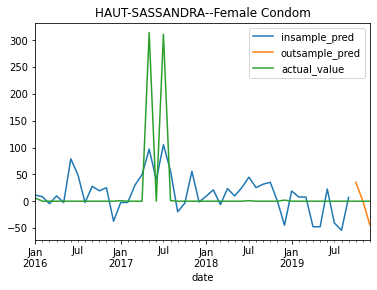

HAUT-SASSANDRA
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=537.360, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=533.170, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=524.278, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=526.880, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=623.557, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=520.662, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=524.179, Time=0.19 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=527.762, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=523.826, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=523.988, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=523.273, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=526.963, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=526.583, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit t

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


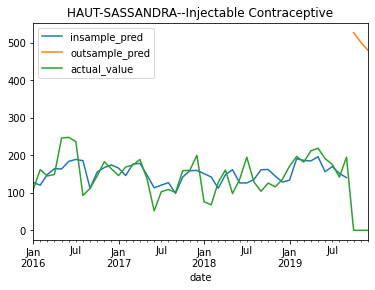

HAUT-SASSANDRA
Intrauterine Device (IUD)
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-1009.550, Time=0.02 sec
Total fit time: 0.023 seconds
(0, 0, 0)
(0, 0, 0, 0)
error
HAUT-SASSANDRA
Male Condom
Performing stepwise search to minimize bic


C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=533.307, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=533.070, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=532.570, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=547.774, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=529.316, Time=0.06 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=532.690, Time=0.15 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : BIC=inf, Time=0.46 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=532.929, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : BIC=532.904, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=529.611, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : BIC=536.768, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[12]             : BIC=536.832, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Total fit time: 2.174 seconds
(0, 0, 1)
(0, 0, 0, 12)


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


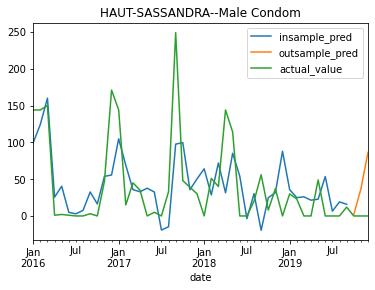

HAUT-SASSANDRA
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=547.148, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=540.547, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=537.192, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=540.574, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=618.749, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=534.108, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=537.049, Time=0.06 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=540.900, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=536.521, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=537.414, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=537.860, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=538.863, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=542.784, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit 

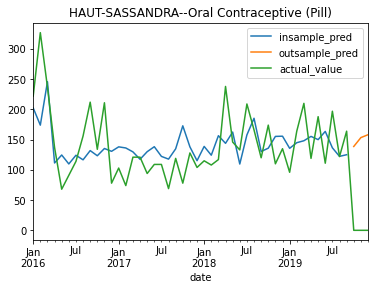

INDENIE-DJUABLIN
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=350.542, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=344.713, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=345.741, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=369.141, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=343.724, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=343.100, Time=0.12 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=346.620, Time=0.18 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : BIC=346.305, Time=0.29 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : BIC=inf, Time=1.13 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=345.472, Time=0.08 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=338.578, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=334.734, Time=0.04 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=338.587, Time=0.26 sec
 A

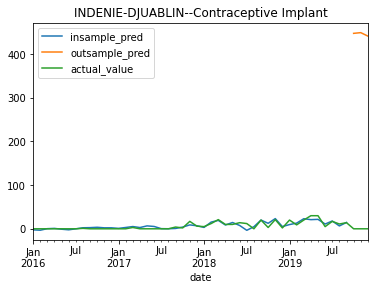

INDENIE-DJUABLIN
Emergency Contraceptive (Pill)
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-1243.161, Time=0.02 sec
Total fit time: 0.025 seconds
(0, 0, 0)
(0, 0, 0, 0)


C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


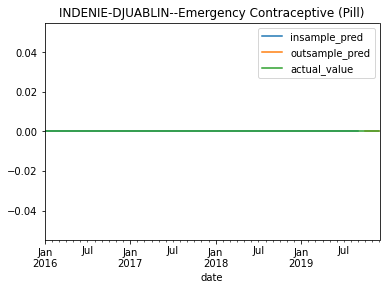

INDENIE-DJUABLIN
Female Condom
INDENIE-DJUABLIN
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=534.722, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=528.367, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=520.490, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=522.599, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=581.177, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=521.751, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : BIC=524.011, Time=0.63 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=523.673, Time=0.40 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=521.551, Time=0.18 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : BIC=528.133, Time=0.60 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=518.704, Time=0.13 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : BIC=522.441, Time=0.43 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=522.410, Time=0.36 sec
 ARIMA(0,0,0)(0,0,1)[12] i

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


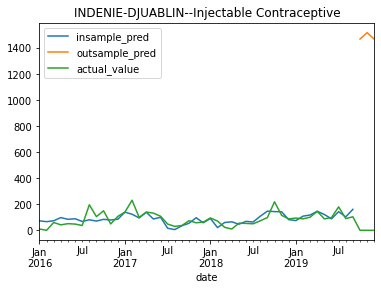

INDENIE-DJUABLIN
Male Condom
INDENIE-DJUABLIN
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=502.821, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=490.377, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=489.039, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=490.505, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=558.056, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=487.662, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=489.344, Time=0.16 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=492.900, Time=0.49 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=490.345, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=490.243, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=489.317, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=494.016, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=497.530, Time=0.02 sec

Best model:  ARIMA(1,0,0)(

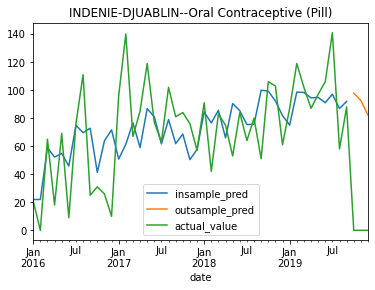

KABADOUGOU-BAFING-FOLON
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=491.225, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=485.169, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=477.028, Time=0.20 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=477.449, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=538.683, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=478.111, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : BIC=479.187, Time=0.52 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=479.966, Time=0.27 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=476.106, Time=0.19 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : BIC=479.954, Time=0.49 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : BIC=483.370, Time=0.94 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=482.391, Time=0.12 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=479.977, Time=0.24 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : BIC=479.977, T

C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


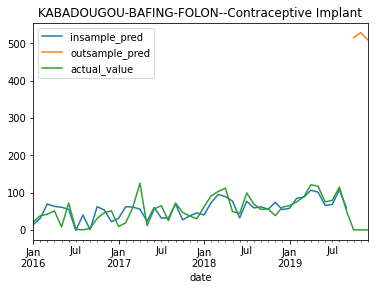

KABADOUGOU-BAFING-FOLON
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=379.183, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=361.136, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=365.176, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=364.512, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=359.922, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=361.417, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=360.841, Time=0.08 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=364.372, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=364.968, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=364.965, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=368.832, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.198 seconds
(0, 0, 0)
(0, 0, 0, 12)


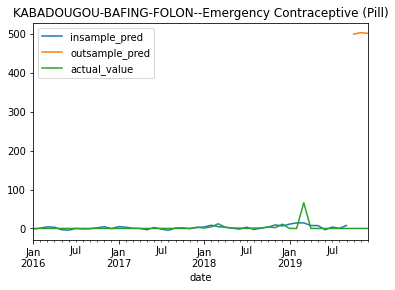

KABADOUGOU-BAFING-FOLON
Female Condom
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-1243.161, Time=0.02 sec
Total fit time: 0.024 seconds
(0, 0, 0)
(0, 0, 0, 0)


C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


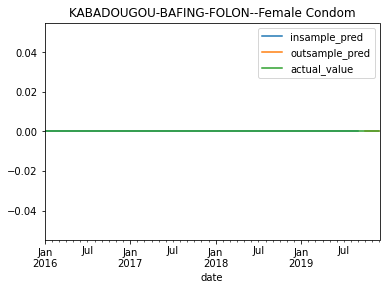

KABADOUGOU-BAFING-FOLON
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.90 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=509.717, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=509.182, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=510.899, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=557.137, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=505.363, Time=0.06 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=509.175, Time=0.19 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=513.059, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=508.842, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=508.656, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=507.047, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=512.516, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=512.597, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total 

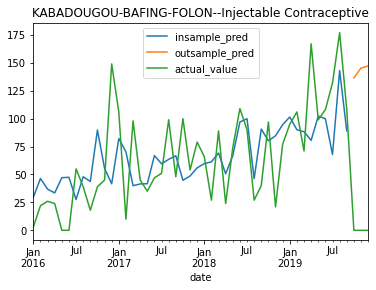

KABADOUGOU-BAFING-FOLON
Intrauterine Device (IUD)
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-983.596, Time=0.02 sec
Total fit time: 0.022 seconds
(0, 0, 0)
(0, 0, 0, 0)


C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


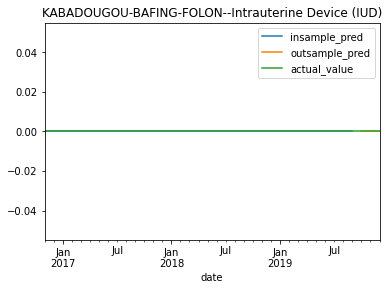

KABADOUGOU-BAFING-FOLON
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=303.760, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=310.610, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=310.370, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=306.068, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=307.626, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=307.628, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=306.760, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=306.515, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=304.166, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.557 seconds
(0, 0, 0)
(0, 0, 0, 12)


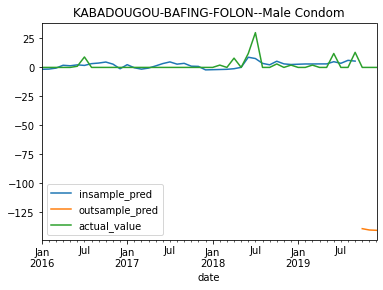

KABADOUGOU-BAFING-FOLON
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=492.129, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=469.629, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=477.261, Time=0.20 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=477.245, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=489.277, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=473.455, Time=0.13 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=473.437, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=477.177, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=473.438, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=473.442, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=477.306, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.780 seconds
(0, 0, 0)
(0, 0, 0, 12)


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


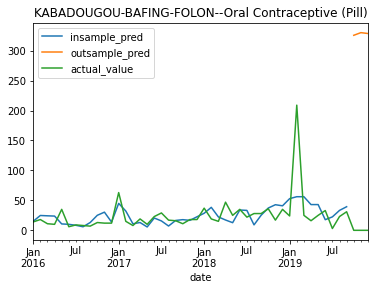

LOH-DJIBOUA
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=451.595, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=464.418, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=440.992, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=456.471, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=496.446, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=437.310, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=441.002, Time=0.11 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=437.630, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=438.529, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=452.613, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=440.413, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=437.467, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 1.931

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


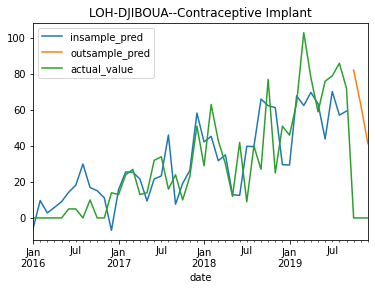

LOH-DJIBOUA
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=222.421, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=216.433, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=215.452, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=213.576, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=216.536, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=209.810, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=213.581, Time=0.08 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : BIC=inf, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=214.341, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : BIC=211.805, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=211.661, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : BIC=213.879, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[12]             : BIC=207.689, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[12]             : BIC=211.560, Time=0.0

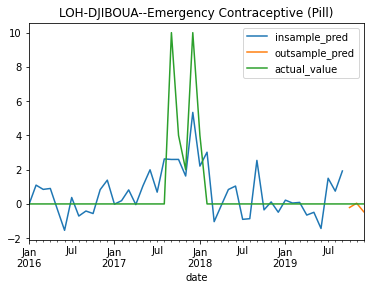

LOH-DJIBOUA
Female Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=288.397, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=295.811, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=295.806, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=285.810, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=292.105, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=292.102, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=292.101, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=292.099, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=inf, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.606 seconds
(0, 0, 0)
(0, 0, 0, 12)
error
LOH-DJIBOUA
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] inte

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


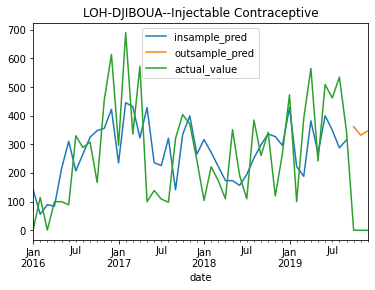

LOH-DJIBOUA
Intrauterine Device (IUD)
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-568.466, Time=0.02 sec
Total fit time: 0.021 seconds
(0, 0, 0)
(0, 0, 0, 0)
error
LOH-DJIBOUA

C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=301.153, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=303.869, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=299.940, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=300.907, Time=0.11 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=304.059, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=304.030, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=307.117, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.722 seconds
(0, 0, 0)
(0, 0, 0, 12)
error
LOH-DJIBOUA
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=in

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


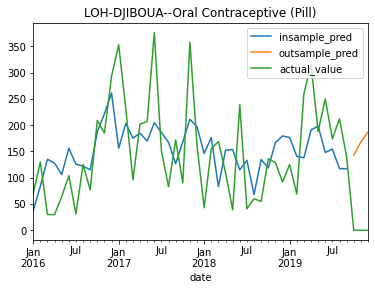

MARAHOUE
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=573.568, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=563.341, Time=0.20 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=571.170, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=594.204, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=559.834, Time=0.06 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=563.116, Time=0.18 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.40 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=554.792, Time=0.06 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=558.555, Time=0.26 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=558.539, Time=0.21 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : BIC=562.310, Time=0.52 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : BIC=558.546, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=557.783, Time=0.11 sec
 ARIMA(1,0

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


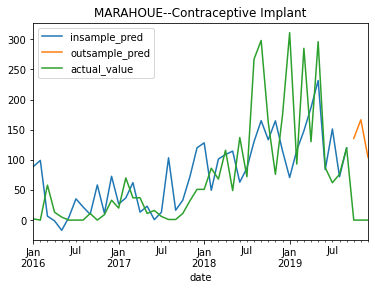

MARAHOUE
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=458.027, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=453.019, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=452.256, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=466.501, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=448.930, Time=0.04 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=452.276, Time=0.14 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : BIC=inf, Time=0.51 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=452.805, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : BIC=452.800, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=449.378, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : BIC=454.871, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[12]             : BIC=451.920, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Total fit time: 2.1

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


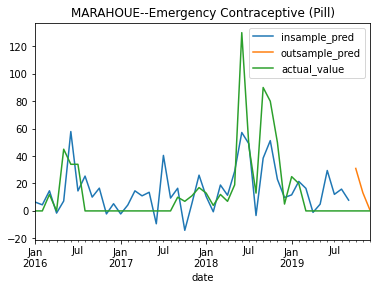

MARAHOUE
Female Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=309.985, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=297.291, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=304.704, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=304.642, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=300.850, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=301.021, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=300.883, Time=0.04 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=300.994, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=301.049, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=301.029, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.338 seconds
(0, 0, 0)
(0, 0, 0, 12)


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


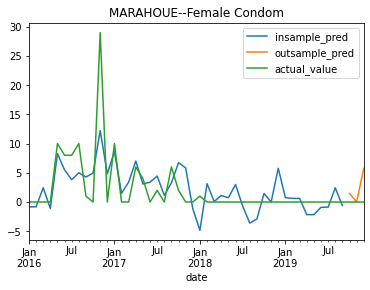

MARAHOUE
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=594.976, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=583.895, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=589.478, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=655.322, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=580.352, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=583.422, Time=0.18 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=583.564, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=583.733, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=587.007, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=587.209, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=584.289, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 2.149 sec

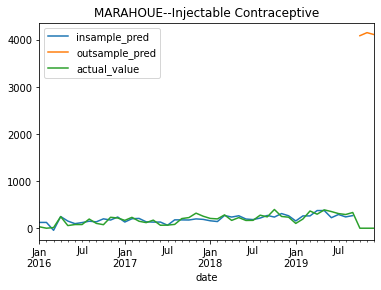

MARAHOUE
Intrauterine Device (IUD)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=277.016, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=256.190, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=263.195, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=263.113, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=255.601, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=259.720, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=259.661, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=263.304, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=259.663, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=259.631, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=263.299, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.258 seconds
(0, 0, 0)
(0, 0, 0, 12)


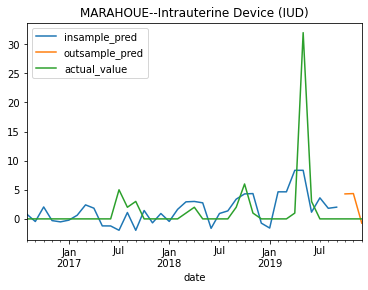

MARAHOUE
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=535.475, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=543.036, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=542.989, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=543.416, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=539.302, Time=0.11 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=539.296, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=543.157, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=539.214, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=539.179, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.993 seconds
(0, 0, 0)
(0, 0, 0, 12)


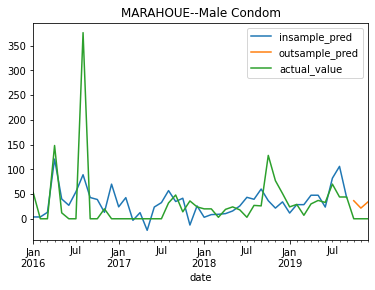

MARAHOUE
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=602.327, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=586.078, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=589.914, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=590.685, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=634.641, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=589.948, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=589.936, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=593.807, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=586.043, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=589.890, Time=0.21 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=593.759, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=589.730, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=589.869, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=586.817, Time=0.06 se

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


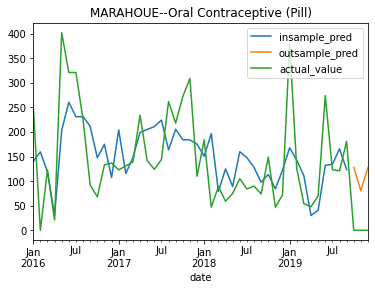

N'ZI-IFOU-MORONOU
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=463.416, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=460.382, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=465.008, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=520.020, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=456.625, Time=0.06 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=460.340, Time=0.17 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=464.092, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=451.827, Time=0.07 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=455.485, Time=0.29 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=455.364, Time=0.20 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : BIC=458.686, Time=0.45 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : BIC=454.164, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=454.799, Time=0.09 s

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


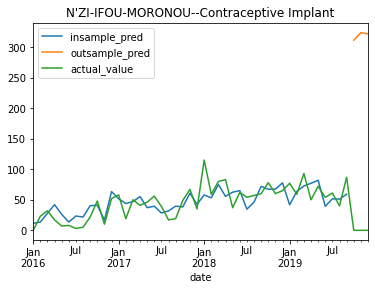

N'ZI-IFOU-MORONOU
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=390.733, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=415.018, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=396.323, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=409.558, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=418.633, Time=0.00 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : BIC=386.858, Time=0.39 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : BIC=382.995, Time=0.14 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : BIC=386.858, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : BIC=379.475, Time=0.09 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : BIC=383.315, Time=0.22 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : BIC=383.315, Time=0.21 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : BIC=387.193, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : BIC=384.835, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=393.116

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


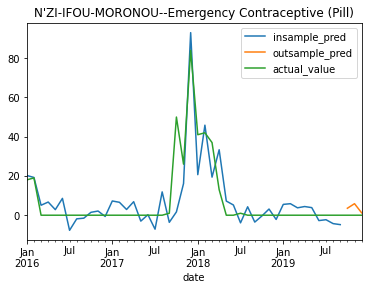

N'ZI-IFOU-MORONOU
Female Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=620.265, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=627.955, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=627.954, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=617.417, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=624.110, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=624.108, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=627.979, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=624.114, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=624.113, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=627.988, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.440 seconds
(0, 0, 0)
(0, 0, 0, 12)


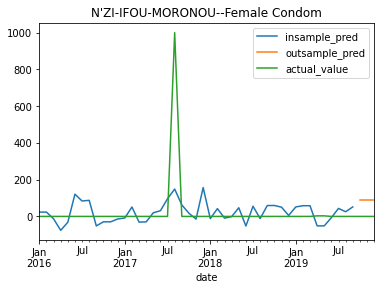

N'ZI-IFOU-MORONOU
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=620.031, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=611.497, Time=0.32 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=615.986, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=667.034, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=608.723, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=610.936, Time=0.21 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=614.528, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=609.874, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=608.713, Time=0.10 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : BIC=611.949, Time=0.46 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : BIC=611.492, Time=0.33 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : BIC=inf, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=614.242, Time=0.07 se

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


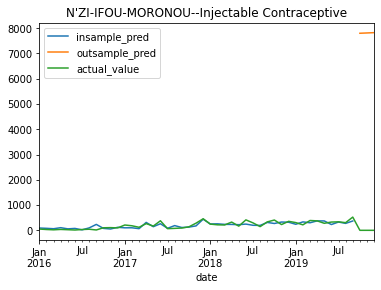

N'ZI-IFOU-MORONOU
Intrauterine Device (IUD)
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-672.218, Time=0.02 sec
Total fit time: 0.023 seconds
(0, 0, 0)
(0, 0, 0, 0)


C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


error
N'ZI-IFOU-MORONOU
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=437.352, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=444.330, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=444.560, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=442.905, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=441.183, Time=0.07 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=441.196, Time=0.08 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=440.517, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=440.727, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=443.888, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.819 seconds
(0, 0, 0)
(0, 0, 0, 12)


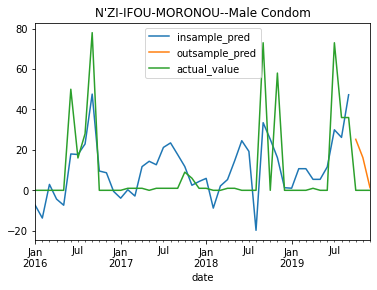

N'ZI-IFOU-MORONOU
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=592.146, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=582.632, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=583.267, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=583.356, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=646.799, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=584.439, Time=0.15 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=582.230, Time=0.14 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : BIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : BIC=inf, Time=0.78 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=582.250, Time=0.22 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : BIC=581.601, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=580.397, Time=0.15 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : BIC=582.782, Time=0.45 sec
 

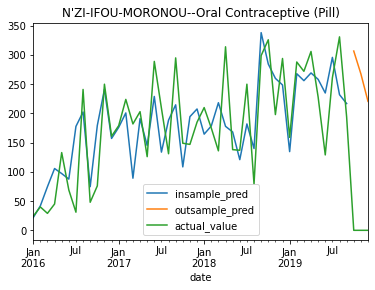

PORO-TCHOLOGO-BAGOUE
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=502.212, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=530.107, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=496.823, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=514.743, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=574.754, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=492.952, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=496.822, Time=0.14 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=500.585, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=491.851, Time=0.07 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=495.718, Time=0.22 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=495.716, Time=0.23 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : BIC=499.519, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : BIC=494.964, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=495.432, Time

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


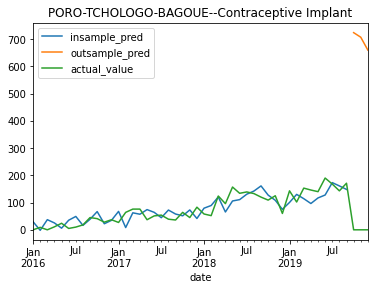

PORO-TCHOLOGO-BAGOUE
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=383.201, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=383.431, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=384.694, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=391.593, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=385.926, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=384.877, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=381.048, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=382.991, Time=0.12 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=382.359, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=382.643, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=382.923, Time=0.

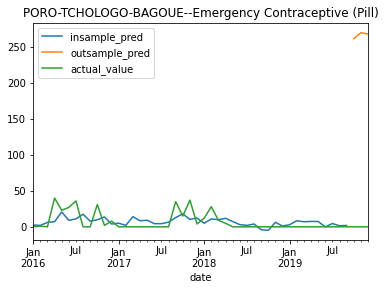

PORO-TCHOLOGO-BAGOUE
Female Condom
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-386.990, Time=0.03 sec
Total fit time: 0.033 seconds
(0, 0, 0)
(0, 0, 0, 0)
error
PORO-TCHOLOGO-BAGOUE
Injectable Contraceptive
Performing stepwise search to minimize bic


C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=654.854, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=655.196, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=641.880, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=645.695, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=713.367, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=638.178, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=641.835, Time=0.06 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.48 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=641.969, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=641.965, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=641.825, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=645.856, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=641.463, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 1.998 seconds
(1, 0, 0)
(0, 0, 0, 12)


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


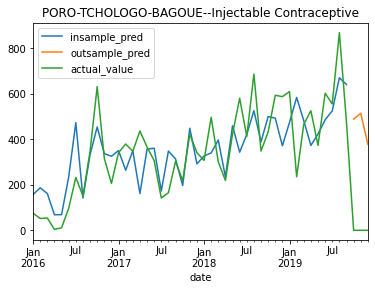

PORO-TCHOLOGO-BAGOUE
Intrauterine Device (IUD)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=275.243, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=258.738, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=265.980, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=266.075, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=258.269, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=262.337, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=262.345, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=266.191, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=262.462, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=262.518, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=264.847, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.355 seconds
(0, 0, 0)
(0, 0, 0, 12)


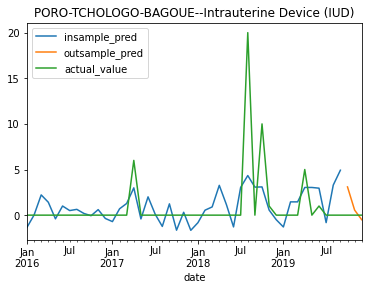

PORO-TCHOLOGO-BAGOUE
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=653.396, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=632.835, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=638.561, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=638.683, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=636.320, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=636.077, Time=0.12 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=635.944, Time=0.09 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=634.987, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=635.210, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=638.697, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.934 seconds
(0, 0, 0)
(0, 0, 0, 12)


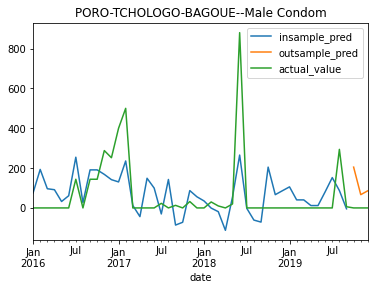

PORO-TCHOLOGO-BAGOUE
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=598.464, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=605.287, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=605.444, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=632.495, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=602.221, Time=0.12 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=602.137, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=601.457, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=601.670, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=602.454, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.922 seconds
(0, 0, 0)
(0, 0, 0, 12)


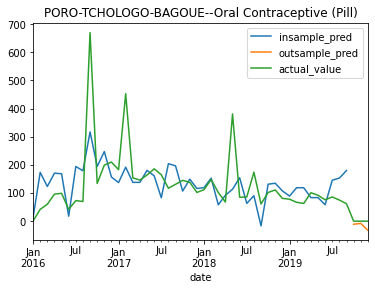

SUD-COMOE
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=493.165, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=483.124, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=491.598, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=530.560, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=479.412, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=483.068, Time=0.16 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.46 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=476.369, Time=0.07 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=480.238, Time=0.25 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=480.237, Time=0.22 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : BIC=484.088, Time=0.23 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : BIC=480.091, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=479.745, Time=0.13 sec
 ARIMA(1,

C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


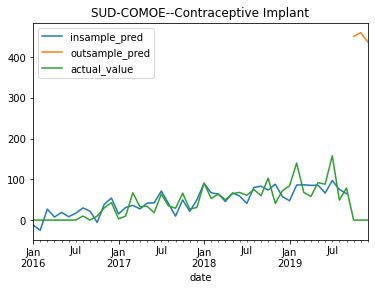

SUD-COMOE
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=118.053, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=125.667, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=125.658, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=115.902, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=121.870, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=121.869, Time=0.04 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.41 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=121.859, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=121.853, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=inf, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.792 seconds
(0, 0, 0)
(0, 0, 0, 12)


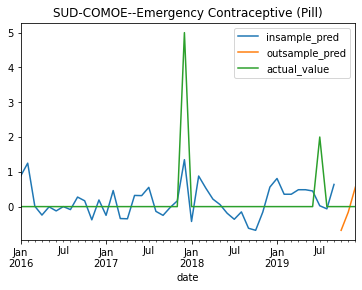

SUD-COMOE
Female Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=209.359, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=216.942, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=216.929, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=207.376, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=213.163, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=213.160, Time=0.04 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.38 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=213.151, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=213.143, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=216.950, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 1.627 seconds
(0, 0, 0)
(0, 0, 0, 12)


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


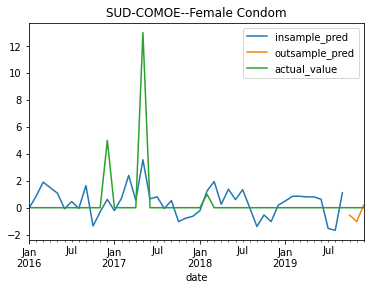

SUD-COMOE
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=643.085, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=623.023, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=635.289, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=732.940, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=619.774, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=622.515, Time=0.14 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=621.471, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=622.506, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=632.460, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=624.192, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=622.646, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 2.158 se

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


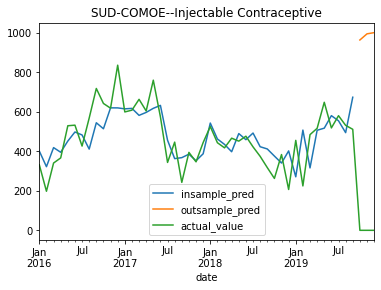

SUD-COMOE
Intrauterine Device (IUD)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=226.089, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=219.188, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=222.069, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=234.507, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=215.689, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=219.146, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=219.152, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=219.156, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=218.653, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=222.787, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=214.793, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12]             : BIC=218.076, Time=0.07 sec
 ARIM

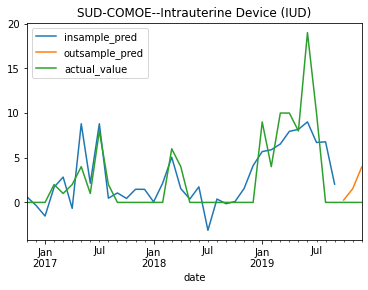

SUD-COMOE
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=544.729, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=508.715, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=523.783, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=590.837, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=504.846, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=508.713, Time=0.18 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=508.476, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=508.561, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=523.213, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=inf, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=504.075, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12]             : BIC=507.724, Time=0.08 sec
 ARIMA(1,0,0)(0,0,1)[12

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


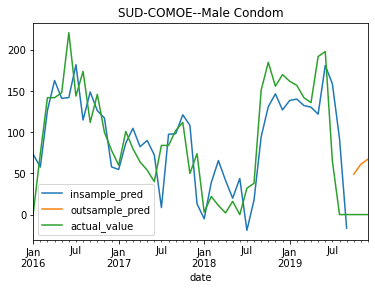

SUD-COMOE
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=587.908, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=603.359, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=577.668, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=594.391, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=682.850, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=575.321, Time=0.07 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=577.331, Time=0.20 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=581.136, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=577.226, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=577.920, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=590.560, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=579.744, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=577.800, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time:

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


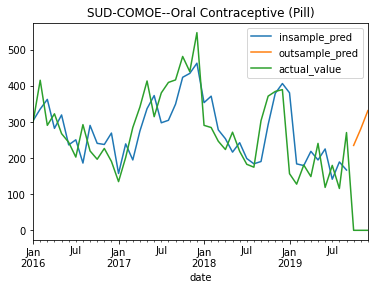

TONKPI
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=466.683, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=460.938, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=457.173, Time=0.20 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=461.672, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=505.868, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=454.203, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=457.111, Time=0.15 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=460.939, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=452.375, Time=0.07 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=455.301, Time=0.22 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=455.236, Time=0.20 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : BIC=459.063, Time=0.38 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : BIC=456.191, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=456.194, Time=0.14 sec
 ARI

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


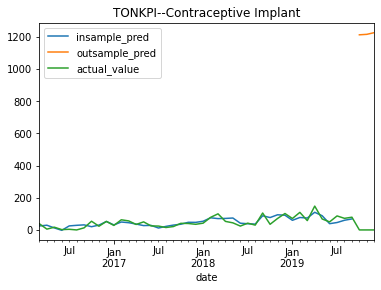

TONKPI
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=259.747, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=233.618, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=244.130, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=261.344, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=229.795, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=233.618, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=231.973, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=232.630, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=240.424, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=235.305, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=226.840, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12]             : BIC=230.668, Time=0.03 sec
 AR

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


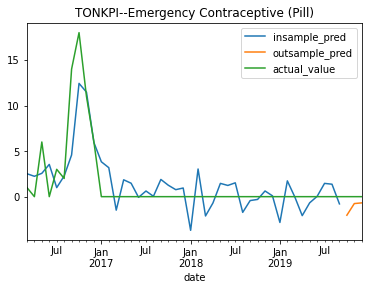

TONKPI
Female Condom
TONKPI
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=559.380, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=564.440, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=553.784, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=559.513, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=606.834, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=552.089, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=553.270, Time=0.19 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=557.030, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=552.081, Time=0.10 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=554.843, Time=0.29 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=554.314, Time=0.27 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : BIC=557.687, Time=0.55 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : BIC=555.057, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=555

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


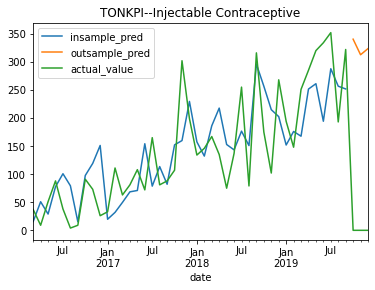

TONKPI
Intrauterine Device (IUD)
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-386.990, Time=0.02 sec
Total fit time: 0.026 seconds
(0, 0, 0)
(0, 0, 0, 0)
error

C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



TONKPI
Male Condom
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.83 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=110.588, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=114.394, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=112.719, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=109.862, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=114.362, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=114.340, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=110.582, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=108.901, Time=0.04 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=112.720, Time=0.11 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : BIC=inf, Time=0.50 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=110.220, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : BIC=109.766, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[12] 

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


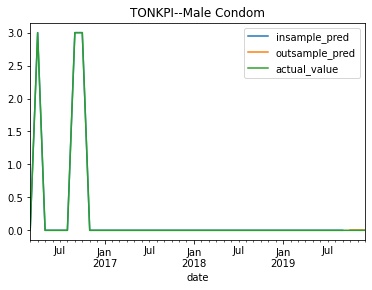

TONKPI
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=445.636, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=453.143, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=453.173, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=484.700, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=449.465, Time=0.11 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=449.465, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=453.293, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=449.315, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=449.344, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=452.911, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.416 seconds
(0, 0, 0)
(0, 0, 0, 12)


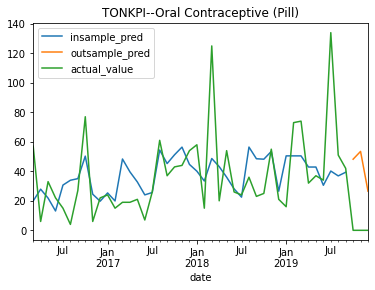

WORODOUGOU-BERE
Contraceptive Implant
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=496.167, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=491.398, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=483.721, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=486.069, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=535.028, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=480.256, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=483.714, Time=0.11 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=487.584, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=484.049, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=484.028, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=482.600, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=487.892, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[12]             : BIC=484.853, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit tim

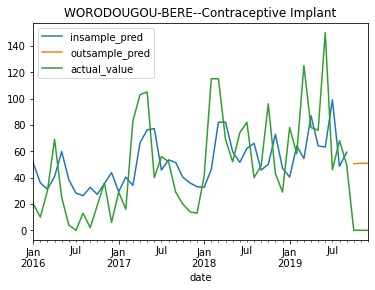

WORODOUGOU-BERE
Emergency Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=58.348, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=45.047, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=43.733, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=57.538, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=40.147, Time=0.06 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=43.730, Time=0.15 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : BIC=inf, Time=0.46 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=39.040, Time=0.04 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : BIC=42.704, Time=0.11 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : BIC=42.704, Time=0.12 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : BIC=inf, Time=0.51 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=41.372, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=41.037, Time=0.07 sec
 ARIMA(1,

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


error
WORODOUGOU-BERE
Female Condom
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-1009.550, Time=0.02 sec
Total fit time: 0.022 seconds
(0, 0, 0)
(0, 0, 0, 0)


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


error
WORODOUGOU-BERE
Injectable Contraceptive
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=492.363, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=483.168, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=482.173, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=480.483, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=545.846, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=478.403, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=480.569, Time=0.17 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : BIC=484.356, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=480.599, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : BIC=482.179, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=479.418, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : BIC=486.102, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[12]             : BIC=512.662, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Tota

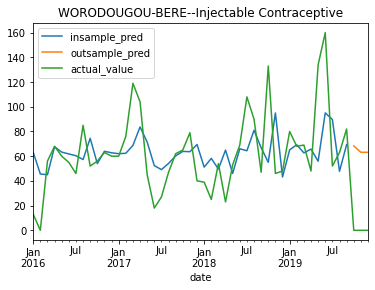

WORODOUGOU-BERE
Intrauterine Device (IUD)
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=-335.173, Time=0.02 sec
Total fit time: 0.022 seconds
(0, 0, 0)
(0, 0, 0, 0)
error
WORODOUGOU-BERE
Male Condom
Performing stepwise search to minimize bic


C:\Users\Herbie Huang\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:397: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=523.699, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=530.156, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=529.825, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=551.645, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=526.335, Time=0.13 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=526.021, Time=0.12 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=inf, Time=0.42 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=527.568, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=527.568, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=531.428, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 2.004 seconds
(0, 0, 0)
(0, 0, 0, 12)


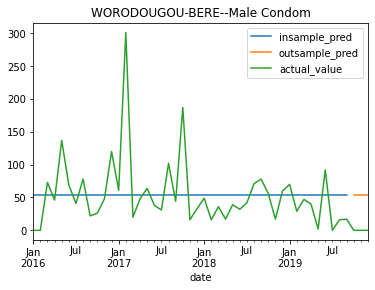

WORODOUGOU-BERE
Oral Contraceptive (Pill)
Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : BIC=438.979, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=427.494, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=427.089, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=424.686, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=493.028, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=421.752, Time=0.03 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=424.266, Time=0.17 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : BIC=427.913, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=425.622, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : BIC=425.622, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=423.994, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : BIC=428.333, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[12]             : BIC=460.998, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Total fit

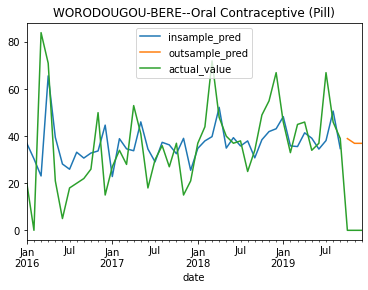

In [23]:
if run_full_data==1:
    df_pred_region_product_type=pd.DataFrame()
    for region in df_product_agg_sum['region'].unique() :
        df1=df_product_agg_sum[df_product_agg_sum['region']==region];
        for product_type in df1['product_type'].unique():
            df2=df1[df1['product_type']==product_type].copy();
            df2['date']=pd.to_datetime(df2['date']);
            df2=df2.set_index(['date']);
            df2=df2.resample('MS').fillna('nearest')
            print(region)
            print(product_type)
            #fit_and_plot_forecast(df2)
            if(len(df2)>10):
                [order,seasonal_order]=auto_arima(df2,col_exog); 
                #result_piece= predict_sarimax(df2,order,seasonal_order,col_exog);
                result_piece= predict_sarimax(df2,order,seasonal_order,col_exog,plot=1);
                df_pred_region_product_type=pd.concat([df_pred_region_product_type,result_piece])
    df_pred_region_product_type.to_csv('../2_pipeline/final_pred_region_producttype_lev.csv')

# Distribute 

In [51]:
contraceptive_logistics.tail(3)

date site_code product_code  year  month  stock_distributed  \
43603 2019-12-01     C3012      AS27134  2019     12                0.0   
42694 2019-12-01     C1701      AS27133  2019     12                0.0   
44503 2019-12-01     C5076      AS46000  2019     12                0.0   

                        region        district  regionroads  \
43603     PORO-TCHOLOGO-BAGOUE  FERKESSEDOUGOU   191.000000   
42694         AGNEBY-TIASSA-ME        TIASSALE    98.000000   
44503  KABADOUGOU-BAFING-FOLON            KORO    97.381154   

       regionasphaltroads  ...   pressure  relativehumidity  rainfallsnowmelt  \
43603           15.000000  ...  1011.5000          30.20000           0.00000   
42694           24.000000  ...   598.9047          78.26958          91.83673   
44503           12.278964  ...   598.9047          78.26958          91.83673   

       visibility  windspeed  maxsustainedwindspeed rainordrizzle     storm  \
43603    5.200000   6.600000              12.700000      0.000000  0.000000   
42694    8.567444   7.227927              14.248726      8.856819  8.747553   
44503    8.567444   7.227927              14.248726      8.856819  8.747553   

            fog  day  
43603  0.000000    1  
42694  1.313337    1  
44503  1.313337    1  

[3 rows x 30 columns]

In [52]:
contraceptive_logistics['group_sum']=contraceptive_logistics.groupby(['product_type','region','date'])['stock_distributed'].transform('sum') 
contraceptive_logistics['share']=contraceptive_logistics['stock_distributed']/contraceptive_logistics['group_sum'] 
y=contraceptive_logistics.share.fillna(0)
y.shape

(44504,)

In [53]:
from sklearn.preprocessing import OneHotEncoder


In [54]:
columns_to_encode=['site_code', 'product_code', 'year', 'month',
       'region', 'district', 'product_type','site_type'] # categorical 
columns_continuous=['regionroads',
       'regionasphaltroads', 'regionearthroads', 'regionsurfacetreatmentroads',
       'regionpoorroads', 'poorroads', 'earthroads', 'asphaltroads', 'temp',
       'maxtemp', 'pressure', 'relativehumidity', 'rainfallsnowmelt',
       'visibility', 'windspeed', 'maxsustainedwindspeed', 'rainordrizzle',
       'storm', 'fog'] # continuous 

ohe = OneHotEncoder(sparse=False,categories='auto')
encoded_columns =  ohe.fit_transform(contraceptive_logistics[columns_to_encode].fillna('NA'))

 

features=pd.DataFrame(data=encoded_columns,columns=ohe.get_feature_names(columns_to_encode))
features[columns_continuous]=contraceptive_logistics[columns_continuous]

In [55]:
X=features
X.shape

(44504, 313)

## Train Test Split

In [56]:
train_end

X.index

contraceptive_logistics.shape

contraceptive_logistics.set_index('date')[:train_end].shape[0]

train_length=contraceptive_logistics.set_index('date')[:train_end].shape[0]

X_train=X[:train_length]
y_train=y[:train_length]

## Random Forest Model

In [57]:
X_train.columns[X_train.isna().any()].tolist()

[]

In [58]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=30,n_estimators=10,random_state=21)
regr.fit(X_train , y_train)
y_pred=regr.predict(X)
 

In [59]:
len(y_pred)

44504

## Export Distribute Region-Product_type Level Result  ../2_pipeline/final_distribute_regionproducttypelev.csv'

In [60]:
distribute_agglev=contraceptive_logistics[['date','region','site_code','product_code','product_type','stock_distributed']].copy()
distribute_agglev['pred_share_regionproducttype_tlev']=y_pred 
distribute_agglev['agg_level']='regionproducttype'
col_export_distribute_agg=['date','region','product_type','site_code','product_code', 'pred_share_regionproducttype_tlev','agg_level']
distribute_agglev[col_export_distribute_agg].to_csv('../2_pipeline/final_distribute_regionproducttypelev.csv')

In [61]:
len(distribute_agglev)

44504

In [62]:
distribute_agglev.head()

date             region site_code product_code  \
14324 2016-01-01   AGNEBY-TIASSA-ME     C1098      AS27137   
26460 2016-01-01             BELIER     C2068      AS46000   
11574 2016-01-01          SUD-COMOE     C1087      AS27000   
34391 2016-01-01  BOUNKANI-GONTOUGO     C4018      AS27139   
32742 2016-01-01  BOUNKANI-GONTOUGO     C4002      AS27132   

                         product_type  stock_distributed  \
14324           Contraceptive Implant                0.0   
26460                     Male Condom                0.0   
11574       Oral Contraceptive (Pill)               50.0   
34391  Emergency Contraceptive (Pill)                0.0   
32742       Oral Contraceptive (Pill)                0.0   

       pred_share_regionproducttype_tlev          agg_level  
14324                           0.050406  regionproducttype  
26460                           0.008019  regionproducttype  
11574                           0.245100  regionproducttype  
34391                           0.007443  regionproducttype  
32742                           0.034629  regionproducttype